`Gradient Boosting` is used to produce a good predictive model from an ensemble of weak models. For, datasets larger than 10_000 `Histogram Gradient Boosting` is more suitable

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn import datasets, ensemble 
from sklearn.inspection import permutation_importance 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

Fitting with `GradientBoostingRegressor`

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

params = {"n_estimators": 500, "max_depth":4, "min_samples_split":5, "learning_rate":0.01, "loss":"squared_error"}

reg_model = ensemble.GradientBoostingRegressor(**params)
reg_model.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg_model.predict(X_test))
print("The Mean Squared Error (MSE) on test set: {:.3f}".format(mse))

The Mean Squared Error (MSE) on test set: 3004.888


Plotting training Deviance

In [6]:
test_score = np.zeros((params["n_estimators"],),dtype=np.float64)
for i, y_pred in enumerate(reg_model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

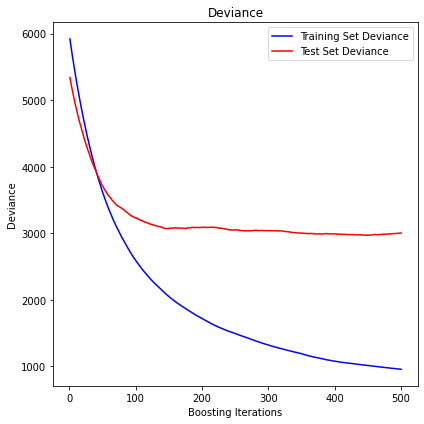

In [7]:
fig = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title("Deviance")
plt.plot(np.arange(params["n_estimators"]) +1, reg_model.train_score_, "b-", label="Training Set Deviance")
plt.plot(np.arange(params["n_estimators"]) +1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc = "upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Plotting `Feature Importance` and `Permutation Feature` <br>

If we have predictive model $m$, dataset, $D$, ref_score $s$, the `permutation importance` algorithm is as: <br>
- For each feature $j$ (column of $D$):<br>
-- For each repetition $k$ in $1,..,K$:<br>
-- -- Randomly shuffle column $j$ to generate a corrupted version of data - $D_{k,j}$ <br>
-- -- Compute importance $i_j$ for feature $f_j$ defined as:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$i_j = s - \frac{1}{K}\sum_{k=1}^Ks_{k,j}$

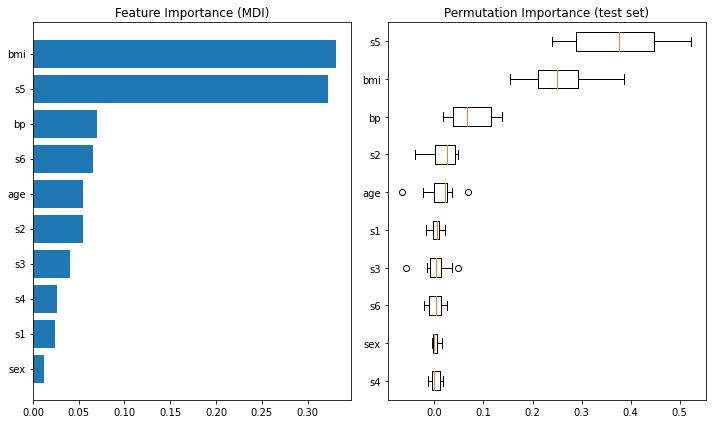

In [8]:
feature_importance = reg_model.feature_importances_ 
sorted_idx = np.argsort(feature_importance) 

pos = np.arange(sorted_idx.shape[0]) + 0.5 

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(reg_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()